<a href="https://colab.research.google.com/github/gnitnaw/LDL/blob/main/tf_framework/c6e1_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
The MIT License (MIT)
Copyright (c) 2021 NVIDIA
Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""


'\nThe MIT License (MIT)\nCopyright (c) 2021 NVIDIA\nPermission is hereby granted, free of charge, to any person obtaining a copy of\nthis software and associated documentation files (the "Software"), to deal in\nthe Software without restriction, including without limitation the rights to\nuse, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of\nthe Software, and to permit persons to whom the Software is furnished to do so,\nsubject to the following conditions:\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS\nFOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR\nCOPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER\nIN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OU

This code example demonstrates how to use a neural network to solve a regression problem, using the Boston housing dataset. More context for this code example can be found in the section "Programming Example: Predicting House Prices with a DNN" in Chapter 6 in the book Learning Deep Learning by Magnus Ekman (ISBN: 9780137470358).


Like the MNIST, the Boston Housing dataset is included in Keras, so it is simple to access using keras.datasets.boston_housing. We standardize both the training and test data by using the mean and standard deviation from the training data. The parameter axis=0 ensures that we compute the mean and standard deviation for each input variable separately. The resulting mean (and standard deviation) is a vector of means instead of a single value. That is, the standardized value of the nitric oxides concentration is not affected by the values of the per capita crime rate or any of the other variables.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import logging
import matplotlib.pyplot as plt

tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 500
BATCH_SIZE = 16

# Read and standardize the data.
boston_housing = keras.datasets.boston_housing
(raw_x_train, y_train), (raw_x_test,
    y_test) = boston_housing.load_data()
x_mean = np.mean(raw_x_train, axis=0)
x_stddev = np.std(raw_x_train, axis=0)
x_train =(raw_x_train - x_mean) / x_stddev
x_test =(raw_x_test - x_mean) / x_stddev
print(x_mean)
print(x_stddev)

65536/57026 [==================================] - 0s 0us/step
[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


We then create the model. Here we use a different syntax than in previous examples. We first instantiate the model object without any layers, and then add them one by one using the member method add().

We define our network to have two hidden layers, so we are now officially doing DL! The two hidden layers in our network implementation have 64 ReLU neurons each, where the first layer is declared to have 13 inputs to match the dataset. The output layer consists of a single neuron with a linear activation function. We use MSE as the loss function and use the Adam optimizer. We tell the compile method that we are interested in seeing the metric mean absolute error. We print out a summary of the model with model.summary() and then start training.


In [3]:
# Create and train model.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[13]))
model.add(Dense(64, activation='relu')) # We are doing DL!
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics =['mean_absolute_error'])
model.summary()
history = model.fit(x_train, y_train, validation_data=(
    x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE,
    verbose=2, shuffle=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
26/26 - 5s - loss: 525.4659 - mean_absolute_error: 20.9719 - val_loss: 490.9705 - val_mean_absolute_error: 20.1326 - 5s/epoch - 184ms/step
Epoch 2/500
26/26 - 0s - loss: 392.3477 - mean_absolute_error: 17.5340 - val_loss: 315.5846 - val_mean_absolute_error: 15.5167 - 143ms/epoch - 6ms/step
Epoch 3/500
26/

After the training is done, we use our model to predict the price for the entire test set and then print out the first four predictions and the correct values so we can get an idea of how correct the model is.


In [4]:
# Print first 4 predictions.
predictions = model.predict(x_test)
for i in range(0, 4):
    print('Prediction: ', predictions[i],
          ', true value: ', y_test[i])


Prediction:  [8.129699] , true value:  7.2
Prediction:  [17.590002] , true value:  18.8
Prediction:  [19.60021] , true value:  19.0
Prediction:  [33.57511] , true value:  27.0


## Reproduce Figure 6-4

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


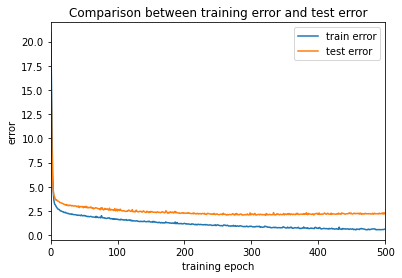

In [5]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,500)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

In [6]:
# Create and train model.
model2 = Sequential()
model2.add(Dense(64, activation='linear', input_shape=[13]))
model2.add(Dense(1, activation='linear'))
model2.compile(loss='mean_squared_error', optimizer='adam',
              metrics =['mean_absolute_error'])
model2.summary()
history2 = model2.fit(x_train, y_train, validation_data=(
    x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE,
    verbose=2, shuffle=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
26/26 - 1s - loss: 575.6266 - mean_absolute_error: 22.2637 - val_loss: 586.3140 - val_mean_absolute_error: 22.7248 - 505ms/epoch - 19ms/step
Epoch 2/500
26/26 - 0s - loss: 549.2586 - mean_absolute_error: 21.9752 - val_loss: 557.6039 - val_mean_absolute_error: 22.3272 - 89ms/epoch - 3ms/step
Epoch 3/500
26/26 - 0s - loss: 527.8169 - mean_absolute_error: 21.6739 - val_loss: 530.2108 - val_mean_absolute_error: 21.8938 - 84ms/epoch - 3ms/st

In [7]:
# Print first 4 predictions.
predictions = model2.predict(x_test)
for i in range(0, 4):
    print('Prediction: ', predictions[i],
          ', true value: ', y_test[i])


Prediction:  [9.769142] , true value:  7.2
Prediction:  [21.115849] , true value:  18.8
Prediction:  [21.08427] , true value:  19.0
Prediction:  [34.015675] , true value:  27.0


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


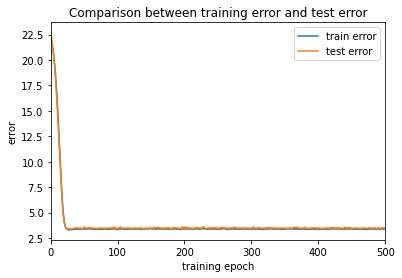

In [8]:
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['mean_absolute_error'])
plt.plot(history2.history['val_mean_absolute_error'])
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,500)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()